### K폴드 교차 검증     
각 시행 단계에서 특정 폴드를 나머지는 학습용으로 사용  
k 번 반복하여 모델 성능 평균을 냄  

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model, X,y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

#### 모델 개선 방법
1. 모델의 복잡도 up
2. 모델의 복잡도 down
3. 더 많은 데이터
4. 표본의 특징 추가

##### 편향-분산 트레이드 오프

In [40]:
from sklearn.preprocessing import PolynomialFeatures #차수
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [34]:
np.random.seed(1)
X = np.random.rand(40,1)**2
y = (10-1. / (X.ravel() + 0.1)) + np.random.randn(40)

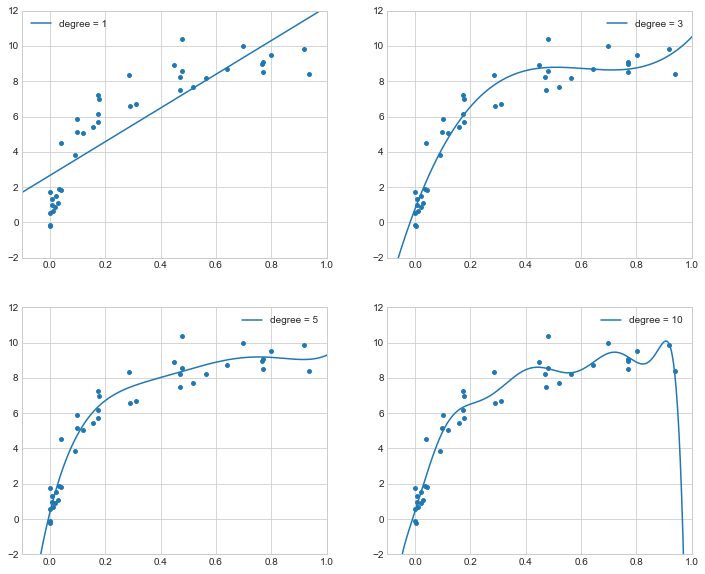

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
X_test = np.linspace(-0.1, 1.1 ,500).reshape(-1,1)

fig = plt.figure(figsize=(12,10))
for i, degree in enumerate([1,3,5,10], start = 1):
    ax = fig.add_subplot(2,2,i)
    ax.scatter(X.ravel(), y, s=15)
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,y).predict(X_test)
    ax.plot(X_test.ravel(), y_test, label = 'degree = {0}'.format(degree))
    ax.set_xlim(-0.1 , 1.0)
    ax.set_ylim(-2 , 12)
    ax.legend(loc = "best")
    

### degree 1 =>  Under Fit(고편향)  / degree 10 => Over Fit(고분산)

데이터 규모도 최적 모델에 영향을 줌

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
np.random.seed(1)
X = np.random.rand(40,1) **2
y = (10 -1./(X.ravel() + 0.1)) + np.random.randn(40)

In [49]:
from sklearn.model_selection import validation_curve

In [54]:
degree = np.arange(0,21)

In [55]:
train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()), \
                                          X, y, "polynomialfeatures__degree", degree, cv=5)

c:\users\admin\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


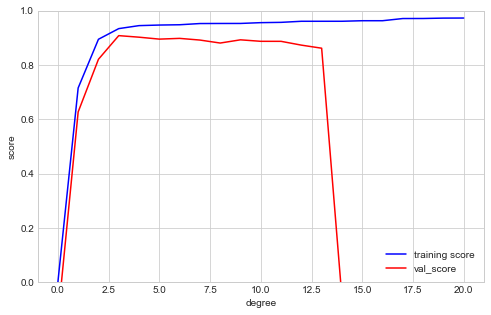

In [60]:
plt.figure(figsize=(8,5))
plt.plot(degree, np.median(train_score, 1),'b-', label = "training score")
plt.plot(degree, np.median(val_score, 1),'r-', label = "val_score")
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc='best');

## 특징공학
 (==encoding)

In [63]:
data = [
         {'price':1200000000 , "rooms" : 3, "location": '잠실동'}
        ,{'price': 700000000, "rooms" : 4, "location": '천호동'}
        ,{'price': 1300000000, "rooms" : 4, "location": '신천동'}
        ,{'price': 450000000, "rooms" : 2, "location": '천호동'}
]

In [64]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False, dtype = np.int)
dv.fit_transform(data)

c:\users\admin\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


array([[         0,          1,          0, 1200000000,          3],
       [         0,          0,          1,  700000000,          4],
       [         1,          0,          0, 1300000000,          4],
       [         0,          0,          1,  450000000,          2]])

In [65]:
dv.get_feature_names()

['location=신천동', 'location=잠실동', 'location=천호동', 'price', 'rooms']

In [66]:
dv = DictVectorizer(sparse=True, dtype = np.int)
dv.fit_transform(data)

c:\users\admin\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

sparse 희소행렬 메모리 적게 먹음

In [67]:
text = ["mobile phone", "battlegrounds mobile game", "phone game"]

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
X = cv.fit_transform(text)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [69]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

,battlegrounds,game,mobile,phone
0,0,0,1,1
1,1,1,1,0
2,0,1,0,1


In [71]:
tv = TfidfVectorizer()
X = tv.fit_transform(text)
X

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [72]:
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

,battlegrounds,game,mobile,phone
0,0.000000,0.000000,0.707107,0.707107
1,0.680919,0.517856,0.517856,0.000000
2,0.000000,0.707107,0.000000,0.707107


In [81]:
X = np.array([
[np.nan, 0, 5]
,[4,8,9]
,[3,6,3]
,[5,np.nan,8]
,[9,5,0]
])
y = np.array([16,14,8,-3,-1])

In [84]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X2 = imputer.fit_transform(X)
X2

array([[5.25, 0.  , 5.  ],
       [4.  , 8.  , 9.  ],
       [3.  , 6.  , 3.  ],
       [5.  , 4.75, 8.  ],
       [9.  , 5.  , 0.  ]])